<a href="https://colab.research.google.com/github/AzureKamul/QS-University-Rankings/blob/main/exploratory_data_analysis_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis Project

Hello, I am [Azure Kamul](https://www.linkedin.com/in/azure-kamul/). This is my first exploratory data analysis (EDA) project with python where i began to learn and implement python programming language to do data analysis by utilizing several modules and libraries such as pandas, numpy, seaborn, matplotlib, plotly, and so on. The project is inspired by the python data analysis course at [jovian.ai](https://jovian.ai/learn/data-analysis-with-python-zero-to-pandas).  

In this project, I conducted several phases of data analysis starting from prepare, clean, format, process, analyze, visualize, and answer several questions from the analysis. The results are including pattern, insight, relationship, comparison, and discovery related to the QS University Rankings.

# Import all required libraries

Before starting the code, we have to import every library that we consider might be used during the data analysis process. In this project, I consider 7 libraries including `pandas, numpy, seaborn, matplotlib, plotly, math and os` to assist my code. 

In [ ]:
!pip install plotly
!pip install opendatasets --upgrade --quiet
!pip install matplotlib --upgrade --quiet
import plotly.express as px
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt 
import os
import opendatasets as od


%matplotlib inline

sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (9, 5)
plt.rcParams['figure.facecolor'] = '#00000000'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Upload or Download the Dataset
The next step is to upload or download your dataset. You can either upload it manually or use `opendataset` to retrieve the dataset from specific url. Access the dataset used in this EDA project [right here](https://www.kaggle.com/datasets/padhmam/qs-world-university-rankings-2017-2022)

For this project, I am going to upload it manually. The dataset is **QS University Rankings Dataset** which contains 15 variables, namely

     1. university = name of the university
     2. year = year of the ranking
     3. rank_display = rank given to the university
     4. score = score given to the university
     5. link = link to the university profile page on QS Website
     6. country = country where the university is located
     7. city = city where the university is located
     8. region = region where the university is located
     9. logo = link to the university logo
     10. Type = type of the university (public or private)
     11. research_output = quality of research at the university
     12. student_faculty_ratio = ratio of students assigned to per faculty
     13. international_students = number of international students enrolled in the university
     14. size = University area size
     15. faculty_count = number of faculty existed in the university
     

To verify the availability of the uploaded dataset, we can use `os.listdir`function from `os` library to check the directory where the dataset was uploaded.  

In [ ]:
from google.colab import files
 
 
uploaded = files.upload()

Saving qs-world-university-rankings.csv to qs-world-university-rankings (2).csv


In [ ]:
os.listdir()

['.config',
 'qs-world-university-rankings.csv',
 '.ipynb_checkpoints',
 'sample_data']

`qs-world-university-rankings.csv` file is right there!. Now, lets move on!

# Load the Dataset in Pandas Dataframe
Now, its time to load the dataset into pandas dataframe so we can proceed the data analysis process. As our dataset is in CSV format, we can load it into pandas by using `read_csv` function. After loading the dataset, we can display it using `head` or `tail` function to see a small portion of the dataset (head to see the top rows and tail to see the bottom rows) 

In [ ]:
qs_univ_df = pd.read_csv('qs-world-university-rankings.csv')

In [ ]:
qs_univ_df.head(10)

,university,year,rank_display,score,link,country,city,region,logo,type,research_output,student_faculty_ratio,international_students,size,faculty_count
0,Massachusetts Institute of Technology (MIT),2017,1,100.0,https://www.topuniversities.com/universities/m...,United States,Cambridge,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,4.0,"3,730",M,"3,065"
1,Stanford University,2017,2,98.7,https://www.topuniversities.com/universities/s...,United States,Stanford,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,3.0,"3,879",L,"4,725"
2,Harvard University,2017,3,98.3,https://www.topuniversities.com/universities/h...,United States,Cambridge,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,5.0,"5,877",L,"4,646"
3,University of Cambridge,2017,4,97.2,https://www.topuniversities.com/universities/u...,United Kingdom,Cambridge,Europe,https://www.topuniversities.com/sites/default/...,Public,Very high,4.0,"7,925",L,"5,800"
4,California Institute of Technology (Caltech),2017,5,96.9,https://www.topuniversities.com/universities/c...,United States,Pasadena,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,2.0,692,S,968
5,University of Oxford,2017,6,96.8,https://www.topuniversities.com/universities/u...,United Kingdom,Oxford,Europe,https://www.topuniversities.com/sites/default/...,Public,Very High,3.0,"8,442",L,"6,708"
6,UCL,2017,7,95.6,https://www.topuniversities.com/universities/ucl,United Kingdom,London,Europe,https://www.topuniversities.com/sites/default/...,Public,Very High,5.0,"21,824",XL,"7,195"
7,ETH Zurich - Swiss Federal Institute of Techno...,2017,8,94.2,https://www.topuniversities.com/universities/e...,Switzerland,Zürich,Europe,https://www.topuniversities.com/sites/default/...,Public,Very High,7.0,"7,733",L,"2,719"
8,Imperial College London,2017,9,94.1,https://www.topuniversities.com/universities/i...,United Kingdom,London,Europe,https://www.topuniversities.com/sites/default/...,Public,Very High,5.0,"11,143",L,"8,000"
9,University of Chicago,2017,10,93.0,https://www.topuniversities.com/universities/u...,United States,Chicago,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,6.0,"4,696",L,"2,703"


In [ ]:
qs_univ_df.tail(10)

,university,year,rank_display,score,link,country,city,region,logo,type,research_output,student_faculty_ratio,international_students,size,faculty_count
6472,University of Sarajevo,2022,1201,NaN,https://www.topuniversities.com/universities/u...,Bosnia and Herzegovina,Sarajevo,Europe,https://www.topuniversities.com/sites/default/...,Public,Medium,23.0,"1,003",XL,"1,306"
6473,University of Split,2022,1201,NaN,https://www.topuniversities.com/universities/u...,Croatia,Split,Europe,https://www.topuniversities.com/sites/default/...,Public,High,16.0,373,L,"1,005"
6474,Università degli studi di Bergamo,2022,1201,NaN,https://www.topuniversities.com/universities/u...,Italy,Bergamo,Europe,https://www.topuniversities.com/sites/default/...,Public,High,24.0,"1,244",L,787
6475,Université Mohammed V de Rabat,2022,1201,NaN,https://www.topuniversities.com/universities/u...,Morocco,Rabat,Africa,https://www.topuniversities.com/sites/default/...,Public,Very High,45.0,"2,441",XL,"1,806"
6476,Université de Caen Normandie,2022,1201,NaN,https://www.topuniversities.com/universities/u...,France,Caen,Europe,https://www.topuniversities.com/sites/default/...,Public,High,19.0,"1,976",L,"1,535"
6477,Université de Tunis,2022,1201,NaN,https://www.topuniversities.com/universities/u...,Tunisia,Tunis,Africa,https://www.topuniversities.com/sites/default/...,Public,High,17.0,57,L,"1,174"
6478,Université de Tunis El Manar,2022,1201,NaN,https://www.topuniversities.com/universities/u...,Tunisia,Tunis,Africa,https://www.topuniversities.com/sites/default/...,Public,Very High,8.0,585,L,"3,504"
6479,Yarmouk University,2022,1201,NaN,https://www.topuniversities.com/universities/y...,Jordan,Irbid,Asia,https://www.topuniversities.com/sites/default/...,Public,Medium,31.0,"2,826",XL,"1,113"
6480,Yildiz Technical University,2022,1201,NaN,https://www.topuniversities.com/universities/y...,Turkey,Istanbul,Asia,https://www.topuniversities.com/sites/default/...,Public,High,20.0,"2,394",XL,"1,688"
6481,Zagazig University,2022,1201,NaN,https://www.topuniversities.com/universities/z...,Egypt,Zagazig,Africa,https://www.topuniversities.com/sites/default/...,Public,High,26.0,"2,300",XL,"5,871"


We can also see a more detailed information about the dataset using `.info` or `.describe` function.

In [ ]:
qs_univ_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6482 entries, 0 to 6481
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   university              6482 non-null   object 
 1   year                    6482 non-null   int64  
 2   rank_display            6414 non-null   object 
 3   score                   2820 non-null   float64
 4   link                    6482 non-null   object 
 5   country                 6482 non-null   object 
 6   city                    6304 non-null   object 
 7   region                  6482 non-null   object 
 8   logo                    6482 non-null   object 
 9   type                    6470 non-null   object 
 10  research_output         6480 non-null   object 
 11  student_faculty_ratio   6407 non-null   float64
 12  international_students  6318 non-null   object 
 13  size                    6480 non-null   object 
 14  faculty_count           6404 non-null   

It seems like there are some variables that contains null values such as score, city, etc. This means the data will require a further data cleaning before it can be analyzed.

In [ ]:
qs_univ_df.describe()

,year,score,student_faculty_ratio
count,6482.000000,2820.000000,6407.000000
mean,2019.693613,46.595532,13.264554
std,1.716683,18.813110,6.604294
min,2017.000000,23.500000,1.000000
25%,2018.000000,31.800000,9.000000
50%,2020.000000,40.600000,12.000000
75%,2021.000000,58.025000,17.000000
max,2022.000000,100.000000,67.000000


To see the shape (total rows and columns) as well as the column list of the dataset, we can use `.shape` and `.columns` function

In [ ]:
qs_univ_df.shape

(6482, 15)

Shape function shows that the dataset contains 15 columns (variables) with 6482 rows. To know the name of each column, we can use the `.columns` function

In [ ]:
qs_univ_df.columns

Index(['university', 'year', 'rank_display', 'score', 'link', 'country',
       'city', 'region', 'logo', 'type', 'research_output',
       'student_faculty_ratio', 'international_students', 'size',
       'faculty_count'],
      dtype='object')

# Data Cleaning and Preparation
In this phase, we are going to clean our data from null values, duplicates, and inappropriate format. We are also going to drop any irrelevant column that might not be useful in our analysis process. 

## Dropping Irrelevant Columns

First, we will remove any irrelevant column that might not be useful in our analysis process. We will drop `link` and `logo` of the qs university outside the dataset. Here, I consider copying it into another dataset as it might be used later. In addition, we will also remove the `score` column as almost 50% of its values are missing.

In [ ]:
link_logo = qs_univ_df[['university', 'link', 'logo', 'score']]
link_logo

,university,link,logo,score
0,Massachusetts Institute of Technology (MIT),https://www.topuniversities.com/universities/m...,https://www.topuniversities.com/sites/default/...,100.0
1,Stanford University,https://www.topuniversities.com/universities/s...,https://www.topuniversities.com/sites/default/...,98.7
2,Harvard University,https://www.topuniversities.com/universities/h...,https://www.topuniversities.com/sites/default/...,98.3
3,University of Cambridge,https://www.topuniversities.com/universities/u...,https://www.topuniversities.com/sites/default/...,97.2
4,California Institute of Technology (Caltech),https://www.topuniversities.com/universities/c...,https://www.topuniversities.com/sites/default/...,96.9
...,...,...,...,...
6477,Université de Tunis,https://www.topuniversities.com/universities/u...,https://www.topuniversities.com/sites/default/...,NaN
6478,Université de Tunis El Manar,https://www.topuniversities.com/universities/u...,https://www.topuniversities.com/sites/default/...,NaN
6479,Yarmouk University,https://www.topuniversities.com/universities/y...,https://www.topuniversities.com/sites/default/...,NaN
6480,Yildiz Technical University,https://www.topuniversities.com/universities/y...,https://www.topuniversities.com/sites/default/...,NaN


As we have save it in another dataframe, lets drop it from our main dataframe using the `.drop` function. `inplace` argument is used to permanently delete the specified columns.

In [ ]:
qs_univ_df.drop(['link','logo','score'],axis=1, inplace= True)

In [ ]:
qs_univ_df

,university,year,rank_display,country,city,region,type,research_output,student_faculty_ratio,international_students,size,faculty_count
0,Massachusetts Institute of Technology (MIT),2017,1,United States,Cambridge,North America,Private,Very High,4.0,"3,730",M,"3,065"
1,Stanford University,2017,2,United States,Stanford,North America,Private,Very High,3.0,"3,879",L,"4,725"
2,Harvard University,2017,3,United States,Cambridge,North America,Private,Very High,5.0,"5,877",L,"4,646"
3,University of Cambridge,2017,4,United Kingdom,Cambridge,Europe,Public,Very high,4.0,"7,925",L,"5,800"
4,California Institute of Technology (Caltech),2017,5,United States,Pasadena,North America,Private,Very High,2.0,692,S,968
...,...,...,...,...,...,...,...,...,...,...,...,...
6477,Université de Tunis,2022,1201,Tunisia,Tunis,Africa,Public,High,17.0,57,L,"1,174"
6478,Université de Tunis El Manar,2022,1201,Tunisia,Tunis,Africa,Public,Very High,8.0,585,L,"3,504"
6479,Yarmouk University,2022,1201,Jordan,Irbid,Asia,Public,Medium,31.0,"2,826",XL,"1,113"
6480,Yildiz Technical University,2022,1201,Turkey,Istanbul,Asia,Public,High,20.0,"2,394",XL,"1,688"


## Removing Duplicates

Next, lets use `drop_duplicates` function to remove any duplicates in case its available.

In [ ]:
qs_univ_df.drop_duplicates(inplace = True)
qs_univ_df.shape

(6482, 12)

As the shape remains the same, it seems like there is no duplicates in the dataset.

## Clean Data From Null Values

Next, lets see the null values on each column by using `isna` function

In [ ]:
qs_univ_df.isna().sum()

university                  0
year                        0
rank_display               68
country                     0
city                      178
region                      0
type                       12
research_output             2
student_faculty_ratio      75
international_students    164
size                        2
faculty_count              78
dtype: int64

In [ ]:
qs_univ_df[qs_univ_df.rank_display.isna()]

,university,year,rank_display,country,city,region,type,research_output,student_faculty_ratio,international_students,size,faculty_count
914,"University of California, San Francisco",2017,NaN,United States,San Francisco,North America,Public,Very High,1.0,125,S,"4,482"
915,Karolinska Institutet,2017,NaN,Sweden,Stockholm,Europe,Public,Very High,NaN,NaN,M,"1,730"
916,Jawaharlal Nehru University,2017,NaN,India,New Delhi,Asia,Public,Very High,15.0,240,M,565
917,INSEAD,2017,NaN,France,Fontainebleau,Europe,Private,Very High,NaN,NaN,S,NaN
918,London Business School,2017,NaN,United Kingdom,London,Europe,Public,Very High,17.0,"1,613",S,106
...,...,...,...,...,...,...,...,...,...,...,...,...
5152,"University of California, San Francisco",2021,NaN,United States,San Francisco,North America,Public,Very High,1.0,125,S,"4,482"
5154,Prague University of Economics and Business,2021,NaN,Czech Republic,Prague,Europe,Public,Very High,27.0,"3,322",L,468
5169,University of the Arts London,2021,NaN,United Kingdom,London,Europe,Public,Very High,13.0,"9,838",L,"1,326"
5177,Weizmann Institute of Science,2021,NaN,Israel,Rehovot,Asia,Public,Very High,NaN,NaN,S,NaN


From the dataframe, we can see some rows contain too many missing values. In that case, lets filter out any row that has more than 2 missing values. Furthermore, we will fill the rest of NaN values in rank_display column by filling it with the previous rank display. This can be done using `.fillna` function with `ffill` method. Once again, `inplace` argument is stated so it applies permanently in the main dataframe.

In [ ]:
drop_index = qs_univ_df[qs_univ_df.isna().sum(axis=1) > 2].index.tolist()
qs_univ_df.drop(drop_index, inplace=True)

In [ ]:
qs_univ_df.rank_display.fillna(method = "ffill", inplace = True)

In [ ]:
qs_univ_df.isna().sum()

university                  0
year                        0
rank_display                0
country                     0
city                      173
region                      0
type                       10
research_output             0
student_faculty_ratio      19
international_students    108
size                        0
faculty_count              26
dtype: int64

Now, we have treat the `rank_display` column from null values, lets move to the rest of uncleaned columns. First, I will check the most dominant type applied in the universities data using `.values_count` function

In [ ]:
qs_univ_df.type.value_counts()

Public     5265
Private    1151
Name: type, dtype: int64

`Public` seems to be the most dominant university type across the globe.

For the null values in `city, international_students, and type` column . I decided to replace it with a certain category. The NaN values in `city` column will be replaced by **Not Specified**, the NaN `international_students` values will be replaced by **0**, and the NaN `type` values will be replaced by **Public** as that category is the most dominant values in Type, so it might not significantly affect the analysis results. 

Then, we can use `dropna` function to **drop all the rest NaN values** as it is might be **too time-consuming to fill it and not affect the results significantly**. 

In [ ]:
qs_univ_df.city.fillna('Not Specified', inplace = True)
qs_univ_df.international_students.fillna("0", inplace = True)
qs_univ_df.type.fillna("Public", inplace = True)
qs_univ_df.dropna(inplace= True)
qs_univ_df.isna().sum()

university                0
year                      0
rank_display              0
country                   0
city                      0
region                    0
type                      0
research_output           0
student_faculty_ratio     0
international_students    0
size                      0
faculty_count             0
dtype: int64

In [ ]:
qs_univ_df

,university,year,rank_display,country,city,region,type,research_output,student_faculty_ratio,international_students,size,faculty_count
0,Massachusetts Institute of Technology (MIT),2017,1,United States,Cambridge,North America,Private,Very High,4.0,"3,730",M,"3,065"
1,Stanford University,2017,2,United States,Stanford,North America,Private,Very High,3.0,"3,879",L,"4,725"
2,Harvard University,2017,3,United States,Cambridge,North America,Private,Very High,5.0,"5,877",L,"4,646"
3,University of Cambridge,2017,4,United Kingdom,Cambridge,Europe,Public,Very high,4.0,"7,925",L,"5,800"
4,California Institute of Technology (Caltech),2017,5,United States,Pasadena,North America,Private,Very High,2.0,692,S,968
...,...,...,...,...,...,...,...,...,...,...,...,...
6477,Université de Tunis,2022,1201,Tunisia,Tunis,Africa,Public,High,17.0,57,L,"1,174"
6478,Université de Tunis El Manar,2022,1201,Tunisia,Tunis,Africa,Public,Very High,8.0,585,L,"3,504"
6479,Yarmouk University,2022,1201,Jordan,Irbid,Asia,Public,Medium,31.0,"2,826",XL,"1,113"
6480,Yildiz Technical University,2022,1201,Turkey,Istanbul,Asia,Public,High,20.0,"2,394",XL,"1,688"


In [ ]:
qs_univ_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6381 entries, 0 to 6481
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   university              6381 non-null   object 
 1   year                    6381 non-null   int64  
 2   rank_display            6381 non-null   object 
 3   country                 6381 non-null   object 
 4   city                    6381 non-null   object 
 5   region                  6381 non-null   object 
 6   type                    6381 non-null   object 
 7   research_output         6381 non-null   object 
 8   student_faculty_ratio   6381 non-null   float64
 9   international_students  6381 non-null   object 
 10  size                    6381 non-null   object 
 11  faculty_count           6381 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 648.1+ KB


## Formatting and Data Types

As we have our data cleaned from null values, lets consider several formatting in the columns. First, we can **capitalize each word** in the `country, city, research_output, and region` values to guarantee the formatting.

In [ ]:
def capitalize(data_series):
    qs_univ_df[data_series] = qs_univ_df[data_series].str.title()

capitalize('region')
capitalize('city')
capitalize('country')
capitalize('research_output')

Furthermore, there are columns like `international_students`, `faculty_count`, and `rank_display` which are still formatted in **object data types**. Why does it happen? Lets check the values using `value_counts` function 

In [ ]:
qs_univ_df.international_students.value_counts()

0        100
1.290     18
564       18
335       18
2.270     18
        ... 
817        1
396        1
542        1
352        1
2,300      1
Name: international_students, Length: 1175, dtype: int64

In [ ]:
qs_univ_df.faculty_count.value_counts()

613      23
865      18
686      18
996      18
785      16
         ..
841       1
1.008     1
524       1
517       1
5,871     1
Name: faculty_count, Length: 1171, dtype: int64

For `international_students` and `faculty_count`, we can see that there are some values are formatted using `.` and `,` which makes pandas **identified the data types as string or object**. To solve this, lets drop all the `.` and `,` by using `str.replace` function then convert it to `int` by using `astype` function.

In [ ]:
qs_univ_df['international_students'] = qs_univ_df.international_students.str.replace(",", "")

In [ ]:
qs_univ_df['international_students'] = qs_univ_df.international_students.str.replace(".", "")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [ ]:
qs_univ_df.international_students = qs_univ_df.international_students.astype(int)

In [ ]:
qs_univ_df.international_students.value_counts()

0       100
335      18
1290     18
564      18
2270     18
       ... 
817       1
396       1
542       1
352       1
2300      1
Name: international_students, Length: 1149, dtype: int64

In [ ]:
qs_univ_df['faculty_count'] = qs_univ_df.faculty_count.str.replace(",", "")

In [ ]:
qs_univ_df['faculty_count'] = qs_univ_df.faculty_count.str.replace(".", "")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [ ]:
qs_univ_df['faculty_count'] = qs_univ_df['faculty_count'].astype(int)

Nice! we have successfully converted the `international_students` and `faculty_count` series into **integer** data types

In [ ]:
qs_univ_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6381 entries, 0 to 6481
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   university              6381 non-null   object 
 1   year                    6381 non-null   int64  
 2   rank_display            6381 non-null   object 
 3   country                 6381 non-null   object 
 4   city                    6381 non-null   object 
 5   region                  6381 non-null   object 
 6   type                    6381 non-null   object 
 7   research_output         6381 non-null   object 
 8   student_faculty_ratio   6381 non-null   float64
 9   international_students  6381 non-null   int64  
 10  size                    6381 non-null   object 
 11  faculty_count           6381 non-null   int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 648.1+ KB


In [ ]:
qs_univ_df.describe()

,year,student_faculty_ratio,international_students,faculty_count
count,6381.000000,6381.000000,6381.000000,6381.000000
mean,2019.700674,13.255446,2951.565115,2066.881523
std,1.718436,6.586911,3446.969137,1839.355084
min,2017.000000,1.000000,0.000000,59.000000
25%,2018.000000,9.000000,662.000000,916.000000
50%,2020.000000,12.000000,1798.000000,1576.000000
75%,2021.000000,16.000000,4049.000000,2708.000000
max,2022.000000,67.000000,31049.000000,20311.000000


For the `rank_display`, lets check if there is any non-digit values inside the series using `negation (~)` and `isdigit` function

In [ ]:
qs_univ_df[~qs_univ_df['rank_display'].str.isdigit()]

,university,year,rank_display,country,city,region,type,research_output,student_faculty_ratio,international_students,size,faculty_count
400,Bandung Institute of Technology (ITB),2017,401-410,Indonesia,Bandung,Asia,Public,Very High,9.0,613,L,2228
401,Brandeis University,2017,401-410,United States,Waltham,North America,Private,Very High,9.0,1554,M,611
402,Illinois Institute of Technology,2017,401-410,United States,Chicago,North America,Private,Very High,15.0,2330,M,402
403,Johannes Gutenberg Universität Mainz,2017,401-410,Germany,Mainz,Europe,Public,Very High,9.0,3605,XL,3473
405,National Research Nuclear University MEPhI (Mo...,2017,401-410,Russia,Moscow,Europe,Public,Very High,5.0,1590,M,998
...,...,...,...,...,...,...,...,...,...,...,...,...
6379,Voronezh State University,2022,1001-1200,Russia,Voronezh,Europe,Public,High,12.0,2585,L,1331
6380,Warsaw University of Life Sciences – SGGW (WUL...,2022,1001-1200,Poland,Warsaw,Europe,Public,Very High,12.0,1147,L,1277
6381,Western Michigan University,2022,1001-1200,United States,Kalamazoo,North America,Public,High,16.0,1664,L,1144
6382,Youngsan University,2022,1001-1200,South Korea,Yangsan,Asia,Private,Medium,13.0,341,M,474


It seems like some `rank_display` values were inputted in range format (401-410). In this case, lets change the `rank_display` data type into integer so that the rank analysis can be done later on.  To do that, first we should list all the indexes of wrong inputted `rank_display` values by using `.tolist` function

In [ ]:
wrong_rank_index = qs_univ_df[~qs_univ_df['rank_display'].str.isdigit()].index.tolist()

Then, lets split `rank_display` column by delimited `-` to get the minimum and maximum rank range of each row. To split the `rank_display` column, we can use `str.split` function.

In [ ]:
qs_univ_df[['min_rank_display', 'max_rank_display']] = qs_univ_df['rank_display'].str.split("-",expand =True)

Now, as we have a minimum and maximum rank range of each rows, lets conduct a simple math to get the median value between the range.

In [ ]:
qs_univ_df

,university,year,rank_display,country,city,region,type,research_output,student_faculty_ratio,international_students,size,faculty_count,min_rank_display,max_rank_display
0,Massachusetts Institute of Technology (MIT),2017,1,United States,Cambridge,North America,Private,Very High,4.0,3730,M,3065,1,None
1,Stanford University,2017,2,United States,Stanford,North America,Private,Very High,3.0,3879,L,4725,2,None
2,Harvard University,2017,3,United States,Cambridge,North America,Private,Very High,5.0,5877,L,4646,3,None
3,University of Cambridge,2017,4,United Kingdom,Cambridge,Europe,Public,Very High,4.0,7925,L,5800,4,None
4,California Institute of Technology (Caltech),2017,5,United States,Pasadena,North America,Private,Very High,2.0,692,S,968,5,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6477,Université de Tunis,2022,1201,Tunisia,Tunis,Africa,Public,High,17.0,57,L,1174,1201,None
6478,Université de Tunis El Manar,2022,1201,Tunisia,Tunis,Africa,Public,Very High,8.0,585,L,3504,1201,None
6479,Yarmouk University,2022,1201,Jordan,Irbid,Asia,Public,Medium,31.0,2826,XL,1113,1201,None
6480,Yildiz Technical University,2022,1201,Turkey,Istanbul,Asia,Public,High,20.0,2394,XL,1688,1201,None


We only calculate the `rank_display` median for the wrong inputted index which we have previously saved in `wrong_rank_index` list. I also decided to round down the calculation results with the assist of `math.floor` function from `math` library

In [ ]:
for n in wrong_rank_index:
    qs_univ_df.loc[n,'rank_display'] = math.floor((int(qs_univ_df.loc[n, 'min_rank_display'])+ int(qs_univ_df.loc[n, 'max_rank_display']))/2)

Finally, lets convert the overall datatype of `rank_display` series into integer data types. Here, i also consider dropping the `min_rank_display` and `max_rank_display` columns as they might not be used anymore later.

In [ ]:
qs_univ_df.rank_display = qs_univ_df.rank_display.astype(int)

In [ ]:
qs_univ_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6381 entries, 0 to 6481
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   university              6381 non-null   object 
 1   year                    6381 non-null   int64  
 2   rank_display            6381 non-null   int64  
 3   country                 6381 non-null   object 
 4   city                    6381 non-null   object 
 5   region                  6381 non-null   object 
 6   type                    6381 non-null   object 
 7   research_output         6381 non-null   object 
 8   student_faculty_ratio   6381 non-null   float64
 9   international_students  6381 non-null   int64  
 10  size                    6381 non-null   object 
 11  faculty_count           6381 non-null   int64  
 12  min_rank_display        6381 non-null   object 
 13  max_rank_display        3047 non-null   object 
dtypes: float64(1), int64(4), object(9)
memor

In [ ]:
qs_univ_df.drop(['min_rank_display', 'max_rank_display'],axis=1, inplace= True)

In [ ]:
qs_univ_df

,university,year,rank_display,country,city,region,type,research_output,student_faculty_ratio,international_students,size,faculty_count
0,Massachusetts Institute of Technology (MIT),2017,1,United States,Cambridge,North America,Private,Very High,4.0,3730,M,3065
1,Stanford University,2017,2,United States,Stanford,North America,Private,Very High,3.0,3879,L,4725
2,Harvard University,2017,3,United States,Cambridge,North America,Private,Very High,5.0,5877,L,4646
3,University of Cambridge,2017,4,United Kingdom,Cambridge,Europe,Public,Very High,4.0,7925,L,5800
4,California Institute of Technology (Caltech),2017,5,United States,Pasadena,North America,Private,Very High,2.0,692,S,968
...,...,...,...,...,...,...,...,...,...,...,...,...
6477,Université de Tunis,2022,1201,Tunisia,Tunis,Africa,Public,High,17.0,57,L,1174
6478,Université de Tunis El Manar,2022,1201,Tunisia,Tunis,Africa,Public,Very High,8.0,585,L,3504
6479,Yarmouk University,2022,1201,Jordan,Irbid,Asia,Public,Medium,31.0,2826,XL,1113
6480,Yildiz Technical University,2022,1201,Turkey,Istanbul,Asia,Public,High,20.0,2394,XL,1688


Cool!, we now have a **cleaner and better-formating dataset** which can be used for the analysis. Lets move to the analyze phase!

# Data Analysis and Visualization

In this phase, we will visualize any interesting pattern and discovery in the dataset using `matplotlib` and `seaborn` libraries.

## Heatmap of Columns Correlation

First, lets see the correlation between each variable using heatmap chart. 

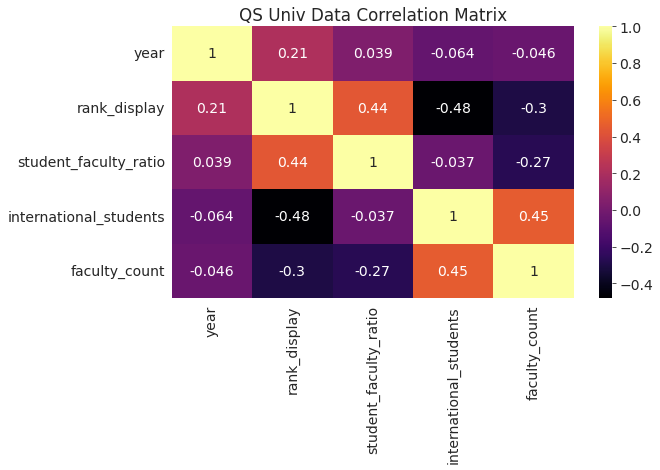

In [ ]:
sns.heatmap(qs_univ_df.corr(),cmap='inferno',annot=True)
plt.title('QS Univ Data Correlation Matrix')
plt.show()

The heatmap indicates a negative weak-to-medium correlation (-0,48) between `rank_display` and `international_students`. To better understand it, lets visualize it into the scatterplot.

## Scatterplot Between Rank and International Students

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


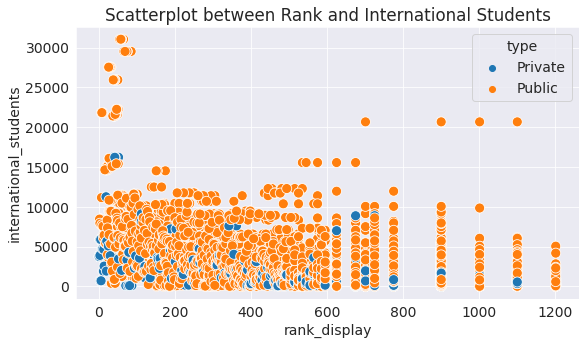

In [ ]:
sns.scatterplot(qs_univ_df.rank_display, # X-axis
                qs_univ_df.international_students,  # Y-axis
                hue = qs_univ_df.type,
                s=100);

# Put a chart title
plt.title("Scatterplot between Rank and International Students");
plt.show()

The plot and correlation value between `rank_display` and `international_students` indicates a slight chance that a university might gain a higher rank if they gather more international students. See in the scatterplot how universities that ranked more than 1000 only acquire less than 8000 international students. 

Still, the correlation is **weak-to-medium** which means it is not certain for a university with low international students to be ranked the lowest.

In [ ]:
top_100_uni = qs_univ_df[qs_univ_df['rank_display'] <= 100]

In [ ]:
grouped_100 = top_100_uni.groupby('year')['international_students'].mean()

In [ ]:
grouped_100

year
2017    7961.544554
2018    7869.800000
2019    7913.902913
2020    7950.790000
2021    7893.610000
2022    7849.940594
Name: international_students, dtype: float64

**The average international students that a top 100 university has is about 8.000**

## Column Chart Comparison By Research Output

Now, lets see how other variables affect the university ranking. 

Here, i want to how the correlation between research output and rank display of a university. We cannot use the correlation matrix from the heatmap since some variables like `research output` has a categorical data type. To solve it, we first create 2 different dataframes. The first one consists top 100 universities, while the other consists universities that ranked in the bottom 100. Then, we can compare both using a bar chart.

In [ ]:
top_100_uni = qs_univ_df.sort_values(['year','rank_display']).groupby('year').head(100)
bottom_100_uni = qs_univ_df.sort_values(['year','rank_display']).groupby('year').tail(100)

In [ ]:
top_100_uni

,university,year,rank_display,country,city,region,type,research_output,student_faculty_ratio,international_students,size,faculty_count
0,Massachusetts Institute of Technology (MIT),2017,1,United States,Cambridge,North America,Private,Very High,4.0,3730,M,3065
1,Stanford University,2017,2,United States,Stanford,North America,Private,Very High,3.0,3879,L,4725
2,Harvard University,2017,3,United States,Cambridge,North America,Private,Very High,5.0,5877,L,4646
3,University of Cambridge,2017,4,United Kingdom,Cambridge,Europe,Public,Very High,4.0,7925,L,5800
4,California Institute of Technology (Caltech),2017,5,United States,Pasadena,North America,Private,Very High,2.0,692,S,968
...,...,...,...,...,...,...,...,...,...,...,...,...
5277,The University of Sheffield,2022,95,United Kingdom,Sheffield,Europe,Public,Very High,8.0,11090,L,3463
5278,Pennsylvania State University,2022,96,United States,University Park,North America,Public,Very High,11.0,6943,XL,4207
5279,Sungkyunkwan University (SKKU),2022,97,South Korea,Suwon,Asia,Private,Very High,7.0,3821,L,3313
5280,University of Science and Technology of China,2022,98,China (Mainland),Hefei,Asia,Public,Very High,7.0,1019,L,2708


In [ ]:
bottom_100_uni

,university,year,rank_display,country,city,region,type,research_output,student_faculty_ratio,international_students,size,faculty_count
820,Universidad Metropolitana,2017,701,Venezuela,Caracas,Latin America,Private,Low,20.0,41,M,275
821,Universidad Nacional Costa Rica,2017,701,Costa Rica,Heredia,Latin America,Public,Medium,14.0,418,L,1119
822,Universidad Nacional de Cuyo,2017,701,Argentina,Mendoza,Latin America,Public,Medium,12.0,3781,XL,3064
823,Universidad Nacional de Mar del Plata,2017,701,Argentina,Mar Del Plata,Latin America,Public,High,21.0,0,L,1001
824,Universidad Nacional de Tucumà¡n,2017,701,Argentina,San Miguel De Tucumán,Latin America,Public,Medium,28.0,0,XL,1886
...,...,...,...,...,...,...,...,...,...,...,...,...
6477,Université de Tunis,2022,1201,Tunisia,Tunis,Africa,Public,High,17.0,57,L,1174
6478,Université de Tunis El Manar,2022,1201,Tunisia,Tunis,Africa,Public,Very High,8.0,585,L,3504
6479,Yarmouk University,2022,1201,Jordan,Irbid,Asia,Public,Medium,31.0,2826,XL,1113
6480,Yildiz Technical University,2022,1201,Turkey,Istanbul,Asia,Public,High,20.0,2394,XL,1688


In [ ]:
list_output = qs_univ_df.research_output.unique().tolist()

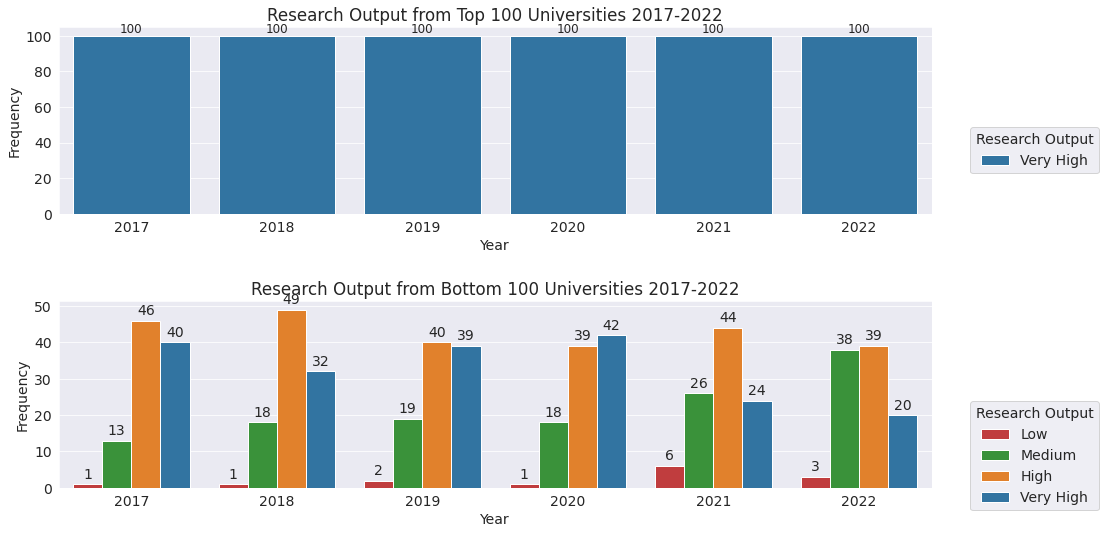

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(16, 8))

#first column chart
#set title
axes[0].set_title("Research Output from Top 100 Universities 2017-2022");

#create countplot
palette_colors = sns.color_palette('tab10')
palette_dict = {list_output: color for list_output, color in zip(list_output, palette_colors)}
sns.countplot(data= top_100_uni, x='year', hue='research_output', ax = axes[0], palette = palette_dict);
#replace legend
axes[0].legend(title ="Research Output", loc= "upper right", bbox_to_anchor=(1.2, 0.5)) 
#set x and y label
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Frequency')
#add data label to each bar 
axes[0].bar_label(axes[0].containers[0], size = 12)

#second column char
#set title
axes[1].set_title("Research Output from Bottom 100 Universities 2017-2022");
#create countplot
sns.countplot(data= bottom_100_uni, x='year', hue='research_output', ax = axes[1], palette = palette_dict);
#replace legend
axes[1].legend(title ="Research Output", loc= "upper right", bbox_to_anchor=(1.2, 0.5)) 
#set x and y label
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Frequency')
#adding label to each bar
for container in axes[1].containers:
    axes[1].bar_label(container, padding=3)

#add spacing between graph
plt.tight_layout(pad=2);
plt.show()

From the bar chart comparison, we can see a clear difference between top 100 universities and bottom 100 universities. Top 100 universities maintain very high research output every year, while universities that ranked under 100 usually have their research output between medium to high. 

The result shows a strong correlation between university rank and research output.

**University with `very high` research output has much more chance to take the top 100 spot**.

## Boxplot Comparison By Faculty Count

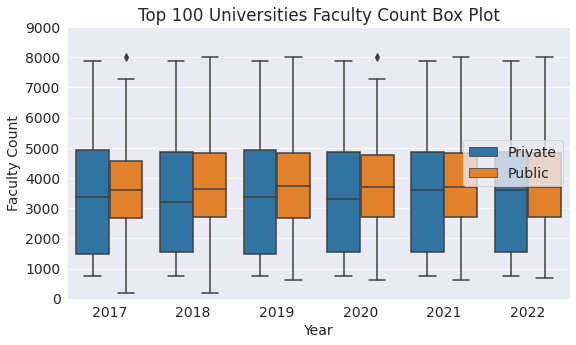

In [ ]:
plt.title("Top 100 Universities Faculty Count Box Plot")
sns.boxplot(data = top_100_uni, x = 'year', y= 'faculty_count', hue= 'type')
plt.legend(title ="Types", loc= 'best', bbox_to_anchor=(1.5, 0.5)) 
plt.xlabel('Year')
plt.ylabel('Faculty Count')
plt.legend()
plt.ylim(0, 9000);
plt.show()

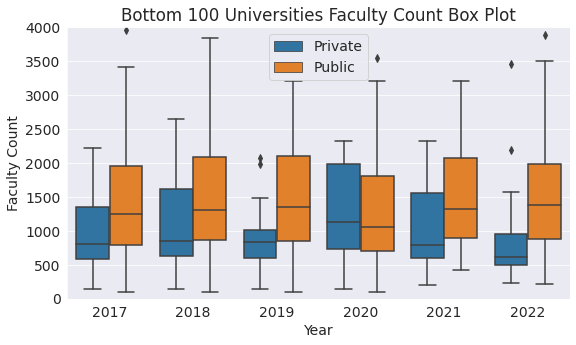

In [ ]:
plt.title("Bottom 100 Universities Faculty Count Box Plot")
sns.boxplot(data = bottom_100_uni, x = 'year', y= 'faculty_count', hue= 'type')
plt.legend(title ="Types", loc= "upper right") 
plt.xlabel('Year')
plt.ylabel('Faculty Count')
plt.legend()
plt.ylim(0, 4000);
plt.show()

Putting the outlier aside, from the boxplot, it seems like top 100 universities have a higher, more stable, and less variability faculty count distribution than bottom 100 universities, especially for the private university.
Faculty count in top 100 universities is distributed between 2000 to 5000, while bottom 100 universities is distributed between 500 to 2000.  

## Total International Students Each Year Line Chart

In [ ]:
yearly_student = qs_univ_df.groupby('year')[['international_students']].sum()

In [ ]:
yearly_student

,international_students
year,
2017,2967187
2018,3041727
2019,3075381
2020,3113703
2021,3260372
2022,3375567


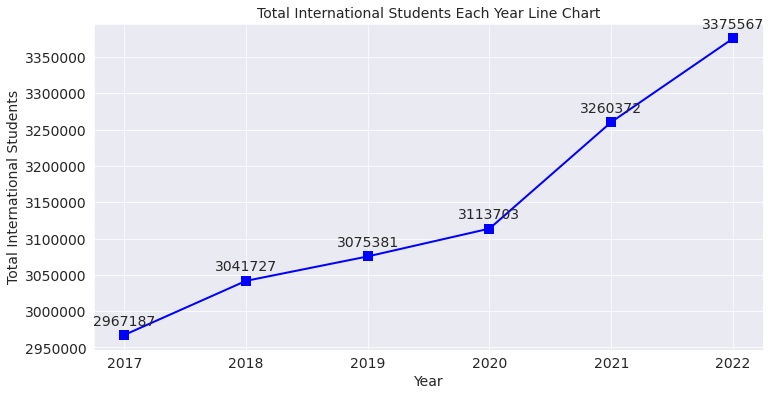

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Total International Students Each Year Line Chart', fontsize = 14)
plt.plot(yearly_student.index, yearly_student.international_students, marker='s', c='b', ls='-', lw=2, ms=8, mew=2)
plt.gca().ticklabel_format(axis='y', style='plain')
plt.xlabel('Year')
plt.ylabel('Total International Students')
for x, y in zip(yearly_student.index, yearly_student.international_students):
    label = y
    plt.annotate(label, (x, y),
                 xycoords="data",
                 textcoords="offset points",
                 xytext=(0, 10), ha="center")
plt.show()

**The line chart shows an uptrend for international students every year**. The trend shows that there are more people who are willing to learn across their country to have a better life and opportunities.

# Ask and Answer Questions

Now lets answer some simple questions by analyzing the datasets!

## What is the most dominant university type?

In [ ]:
count_type = qs_univ_df.type.value_counts()

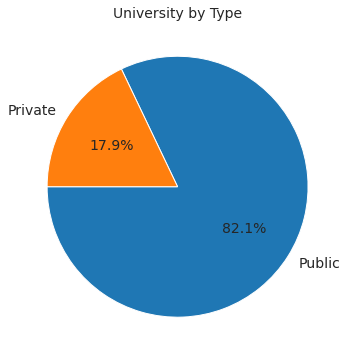

In [ ]:
plt.figure(figsize=(12,6))
plt.title("University by Type", fontsize= 14)
plt.pie(count_type, labels=count_type.index, autopct='%1.1f%%', startangle=180);
plt.show()

**The most dominant university type is Public with over 82,1% accumulation.**

## What are the Top 10 Universities in The World?

To answer that, we need to create a dataframe consisting universities ranked below 10. We can do that with filtering approach

In [ ]:
top_10_uni = qs_univ_df[qs_univ_df['rank_display'] <= 10]

In [ ]:
top_10_uni

,university,year,rank_display,country,city,region,type,research_output,student_faculty_ratio,international_students,size,faculty_count
0,Massachusetts Institute of Technology (MIT),2017,1,United States,Cambridge,North America,Private,Very High,4.0,3730,M,3065
1,Stanford University,2017,2,United States,Stanford,North America,Private,Very High,3.0,3879,L,4725
2,Harvard University,2017,3,United States,Cambridge,North America,Private,Very High,5.0,5877,L,4646
3,University of Cambridge,2017,4,United Kingdom,Cambridge,Europe,Public,Very High,4.0,7925,L,5800
4,California Institute of Technology (Caltech),2017,5,United States,Pasadena,North America,Private,Very High,2.0,692,S,968
5,University of Oxford,2017,6,United Kingdom,Oxford,Europe,Public,Very High,3.0,8442,L,6708
6,UCL,2017,7,United Kingdom,London,Europe,Public,Very High,5.0,21824,XL,7195
7,ETH Zurich - Swiss Federal Institute of Techno...,2017,8,Switzerland,Zürich,Europe,Public,Very High,7.0,7733,L,2719
8,Imperial College London,2017,9,United Kingdom,London,Europe,Public,Very High,5.0,11143,L,8000
9,University of Chicago,2017,10,United States,Chicago,North America,Private,Very High,6.0,4696,L,2703


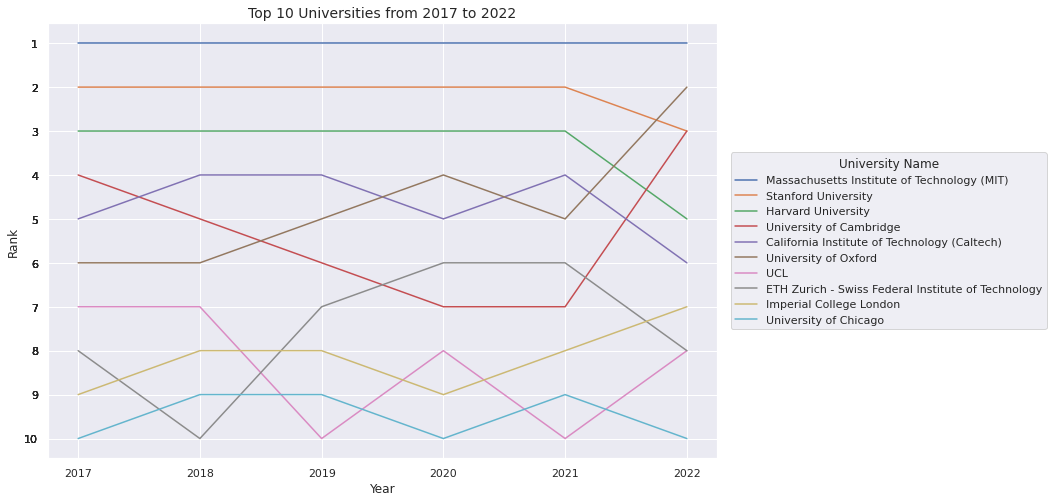

In [ ]:
#Set the figure size
sns.set(rc={"figure.figsize":(12, 8)}) #width=8, height=4
#Create the lineplot between rank and year of top 10 universities
top_uni = sns.lineplot(data=top_10_uni, x="year", y="rank_display", hue="university",markers=True, dashes=False)
#Adjust the legend title and location
plt.legend(title ="University Name", loc= "right", bbox_to_anchor=(1.5, 0.5))
#Rename the y and x label
plt.ylabel('Rank')
plt.xlabel('Year')
#Invert Y-axis
plt.gca().invert_yaxis()
#Put a chart title
plt.title('Top 10 Universities from 2017 to 2022',fontsize= 14)
#Show all the y axis values (from 1 - 10) Notes: Add semicolon to surpress some unwanted text before the graph
top_uni.set_yticks(top_10_uni.rank_display);
plt.show()

Wow!, it seems like **MIT** consecutively obtained the first rank for over 5 years. Furthermore, universities in the top 10 ranking remain the same for the last 5 years, they only switch position!

## Where are top universities usually located?

To answer this question, I am going to use the top 100 universities data frame previously created. Then, we can group it based on the country.

In [ ]:
top_region= top_100_uni.region.value_counts()

In [ ]:
top_region

Europe           206
North America    197
Asia             143
Oceania           47
Latin America      7
Name: region, dtype: int64

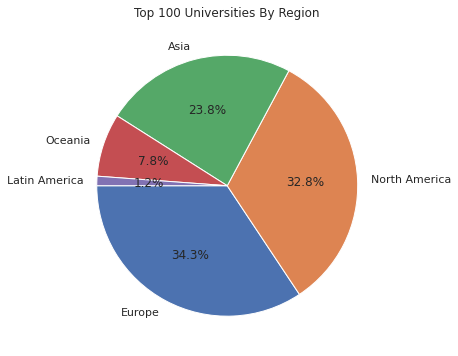

In [ ]:
plt.figure(figsize=(12,6))
plt.title("Top 100 Universities By Region")
plt.pie(top_region, labels=top_region.index, autopct='%1.1f%%', startangle=180);
plt.show()

Top universities seems to be located in North America or Europe. More than 60% of top 100 universities is located in both of those regions. The rest is followed by Asia, Oceania, and Latin America.

## How about the country? Which country in Europe and North America that do consist the highest number of top universities?

In [ ]:
top_country_europe = top_100_uni[top_100_uni.region == 'Europe'].country.value_counts()

In [ ]:
top_country_europe

United Kingdom    105
Switzerland        20
Germany            18
France             17
Netherlands        13
Sweden             12
Denmark             7
Belgium             6
Russia              5
Ireland             2
Finland             1
Name: country, dtype: int64

In [ ]:
top_country_NA = top_100_uni[top_100_uni.region == 'North America'].country.value_counts()

In [ ]:
top_country_NA

United States    177
Canada            20
Name: country, dtype: int64

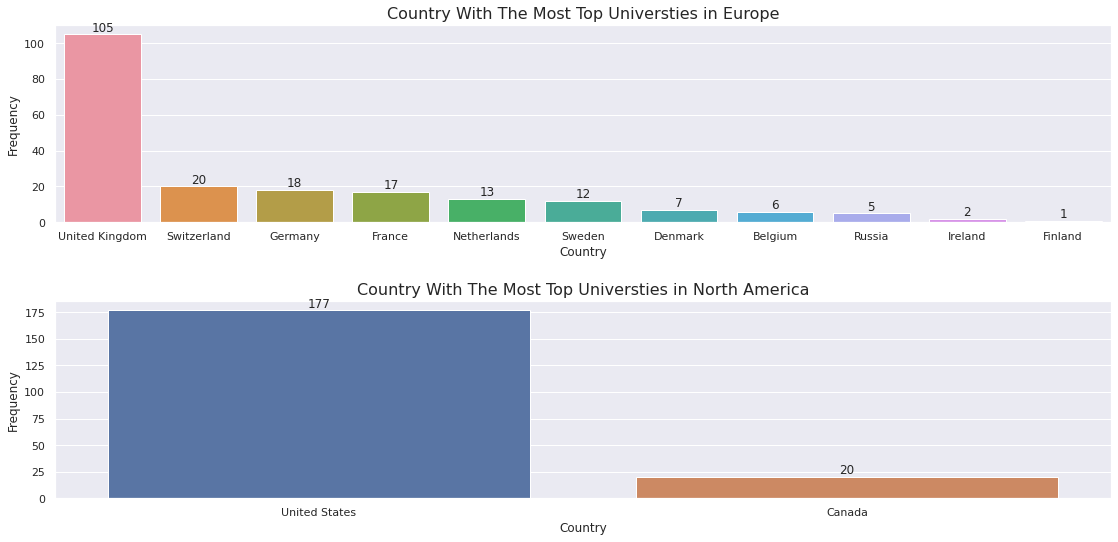

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(16, 8))

#first bar chart
#set title
axes[0].set_title("Country With The Most Top Universties in Europe",size= 16);
#create bar chart
sns.barplot(x= top_country_europe.index, y = top_country_europe, ax = axes[0])
axes[0].set_xlabel('Country')
axes[0].set_ylabel('Frequency')
axes[0].bar_label(axes[0].containers[0], size = 12)

#second bar chart
#set title
axes[1].set_title("Country With The Most Top Universties in North America", size = 16);
#create bar chart
sns.barplot(x= top_country_NA.index, y = top_country_NA, ax = axes[1],)
axes[1].set_xlabel('Country')
axes[1].set_ylabel('Frequency')
axes[1].bar_label(axes[1].containers[0], size = 12)


#add spacing between graph
plt.tight_layout(pad=2);
plt.show()

The bar chart shows `United Kingdom` as the country with the most top universities in Europe region, On the other hand, `United States` almost fetches all of the top universities in North America region.

## Which country does accumulate the highest number of international students?

In [ ]:
student_country_2022 = qs_univ_df[qs_univ_df.year == 2022].groupby('country')[['international_students']].sum()

In [ ]:
student_country_2022

,international_students
country,
Argentina,50741
Armenia,403
Australia,291909
Austria,34675
Azerbaijan,726
...,...
United Kingdom,521165
United States,508552
Uruguay,2372


In [ ]:
student_country_2022.sort_values('international_students', ascending = False)

,international_students
country,
United Kingdom,521165
United States,508552
Australia,291909
Canada,189470
Germany,175836
...,...
Armenia,403
Oman,248
Sri Lanka,236


In [ ]:
fig = px.choropleth(student_country_2022,
                   locations = student_country_2022.index,
                   locationmode='country names',
                   color = 'international_students',
                   title = 'Country by International Students Map')
fig.show()

From the world map visualization, There are two country with the highest color scale which are `United States of America and United Kingdom`. USA accumulates over 521.165 international students in 2022, while UK accumulates 508.552 international students. Thus, country that accumulates the highest number of international students in 2022 is `United States of America`.

# End of The Project
This is the end of this EDA project. Thank you [jovian.ai course](https://jovian.ai/learn/data-analysis-with-python-zero-to-pandas) for facilitating this course. I learned a lot about python and its data analysis libraries. For any feedback regarding this project, please contact me at azurekam5@gmail.com.

Also, check out my LinkedIn [right here](https://www.linkedin.com/in/azure-kamul/)
 
Thank you!